Saving penguin_dataset.csv to penguin_dataset (1).csv


BoundedFloatText(value=48.5, description='Bill Length (mm):', max=60.0, min=32.0, step=0.1, style=DescriptionS…

BoundedFloatText(value=15.5, description='Bill Depth (mm):', max=22.0, min=13.0, step=0.1, style=DescriptionSt…

Button(button_style='success', description='Predict Species', icon='check', style=ButtonStyle(), tooltip='Clic…

Output()

Logistic Regression Accuracy on Training Data: 0.9623
Logistic Regression Accuracy on Test Data: 0.9709


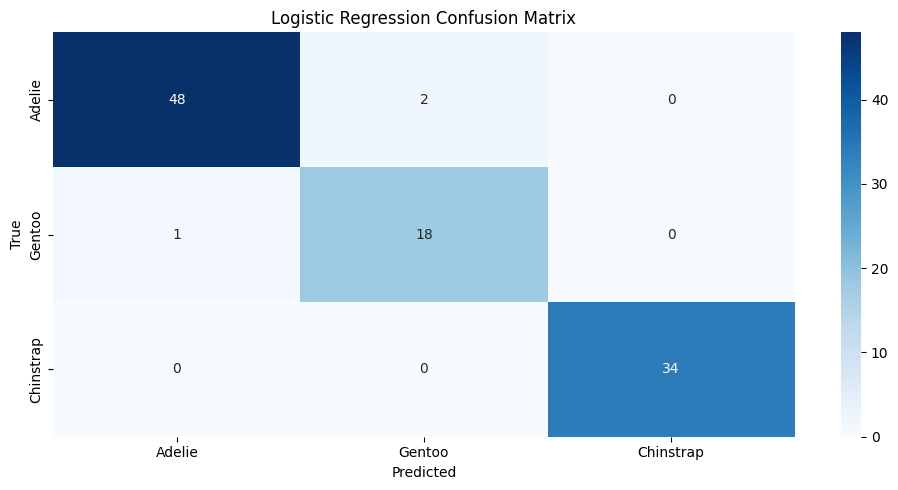

In [3]:
# Install necessary packages
%pip install pyarrow
%pip install seaborn
%pip install ipywidgets

# Import libraries
import pandas as pd
from sklearn import linear_model, metrics, model_selection
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import ipywidgets as widgets
from IPython.display import display

# Load the dataset
from google.colab import files
uploaded = files.upload()
file_path = 'penguin_dataset.csv'
df = pd.read_csv(file_path)

# Prepare features and target variable
y = df['species']  # 'Species' is the target column
X = df[['bill_length_mm', 'bill_depth_mm']]  # Select bill length and depth

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the model
mylog_model = linear_model.LogisticRegression(max_iter=1000, random_state=42)

# Fit model to the training data
mylog_model.fit(X_train, y_train)

# Widgets for interactive input
bill_length = widgets.BoundedFloatText(
    description='Bill Length (mm):',
    value=48.5,
    min=32.0,  # Minimum bill length value
    max=60.0,  # Maximum bill length value
    step=0.1,  # Step size for increment/decrement
    style={'description_width': 'initial'}
)

bill_depth = widgets.BoundedFloatText(
    description='Bill Depth (mm):',
    value=15.5,
    min=13.0,  # Minimum bill depth value
    max=22.0,  # Maximum bill depth value
    step=0.1,  # Step size for increment/decrement
    style={'description_width': 'initial'}
)

output = widgets.Output()

# Function to handle prediction
def predict_species(change):
    with output:
        output.clear_output()  # Clear previous output
        try:
            # Get input values
            length = bill_length.value
            depth = bill_depth.value

            # Create a DataFrame with the same feature names as during training
            input_data = pd.DataFrame([[length, depth]], columns=['bill_length_mm', 'bill_depth_mm'])

            # Make prediction
            prediction = mylog_model.predict(input_data)[0]

            # Display the result
            print(f"Predicted Penguin Species: {prediction}")
        except Exception as e:
            print(f"Error: {e}")

# Button to trigger prediction
predict_button = widgets.Button(
    description='Predict Species',
    button_style='success',
    tooltip='Click to predict the penguin species',
    icon='check'
)
predict_button.on_click(predict_species)

# Display widgets
display(bill_length, bill_depth, predict_button, output)

# Evaluate model and show metrics
# Make predictions
y_pred_log = mylog_model.predict(X_test)

# Print accuracy scores

# Accuracy is calculated for training data as well for verification purposes, to check for
# overfitting/underfitting.
# A large gap in performance suggests overfitting (high accuracy on training,
# low accuracy on test), while poor performance on both indicates underfitting.
print(f"Logistic Regression Accuracy on Training Data: {mylog_model.score(X_train, y_train):.4f}")
print(f"Logistic Regression Accuracy on Test Data: {mylog_model.score(X_test, y_test):.4f}")

# Confusion matrix
cm_log = confusion_matrix(y_test, y_pred_log)

# Plot confusion matrix
plt.figure(figsize=(10, 5))

# Logistic Regression Confusion Matrix
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues', xticklabels=df['species'].unique(), yticklabels=df['species'].unique())
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

# Show the confusion matrix
plt.tight_layout()
plt.show()

